In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset("titanic")

print("original dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())


original dataset shape: (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


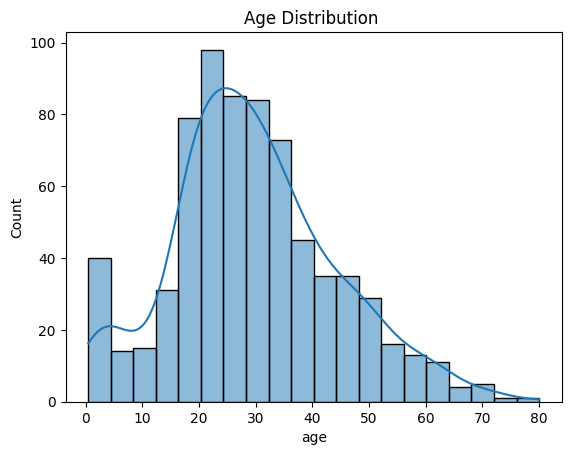

In [ ]:
plt.figure()
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution ')
plt.show()

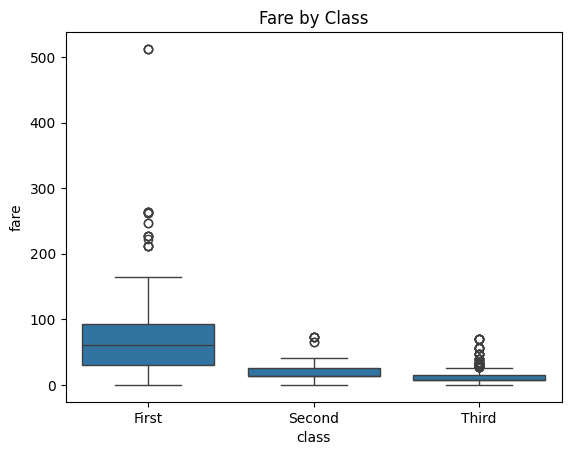

In [5]:
plt.figure()
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare by Class')
plt.show()

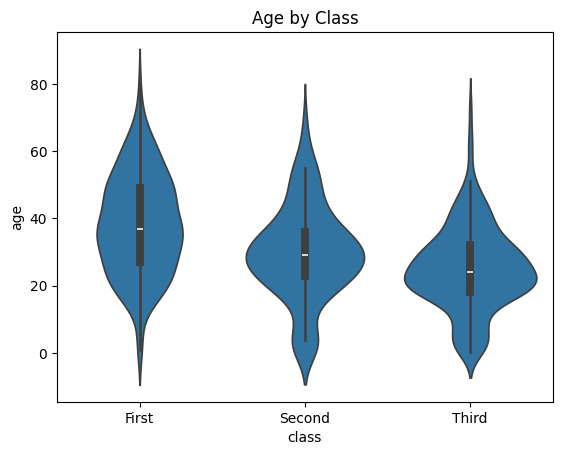

In [6]:
plt.figure()
sns.violinplot(x='class', y='age', data=df)
plt.title('Age by Class')
plt.show()

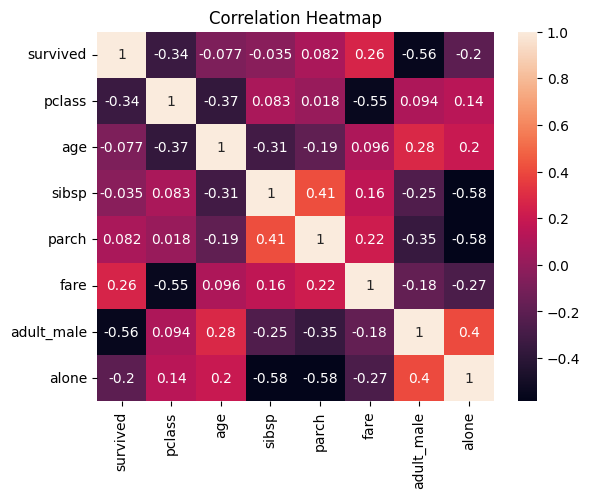

In [7]:
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Bitcoin DB

In [11]:
df = pd.read_csv("Bitcoin_Price_Dataset_2014_2023.csv")

print("original dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

original dataset shape: (3393, 17)

First 5 rows:
         Date    Open    High     Low   Close    Volume  Daily_Return  \
0  2014-09-17  465.86  468.17  452.42  457.33  21056800           NaN   
1  2014-09-18  456.86  456.86  413.10  424.44  34483200         -7.19   
2  2014-09-19  424.10  427.83  384.53  394.80  37919700         -6.98   
3  2014-09-20  394.67  423.30  389.88  408.90  36863600          3.57   
4  2014-09-21  408.08  412.43  393.18  398.82  26580100         -2.47   

   Price_Range  Price_Change  MA_7  MA_30  MA_90  Volatility_30d Day_of_Week  \
0        15.75         -8.53   NaN    NaN    NaN             NaN   Wednesday   
1        43.76        -32.42   NaN    NaN    NaN             NaN    Thursday   
2        43.30        -29.31   NaN    NaN    NaN             NaN      Friday   
3        33.41         14.23   NaN    NaN    NaN             NaN    Saturday   
4        19.24         -9.26   NaN    NaN    NaN             NaN      Sunday   

   Month  Year  Quarter  
0   

In [12]:
print("\n missing values:")
print(df.isnull().sum())


 missing values:
Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Daily_Return       1
Price_Range        0
Price_Change       0
MA_7               6
MA_30             29
MA_90             89
Volatility_30d    30
Day_of_Week        0
Month              0
Year               0
Quarter            0
dtype: int64


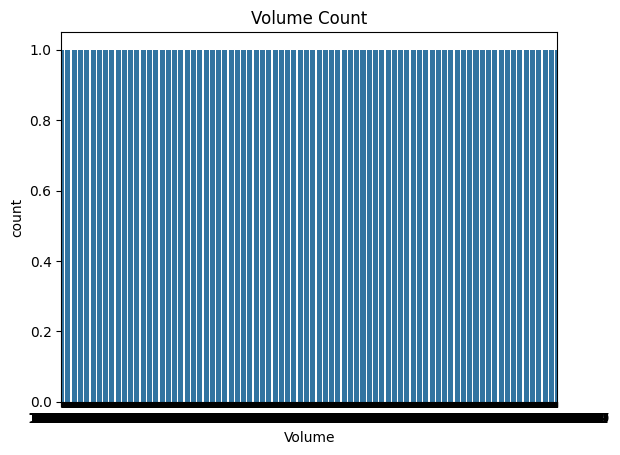

In [ ]:
plt.figure()
sns.countplot(x='Volume', data=df)
plt.title('Volume Count')
plt.show()

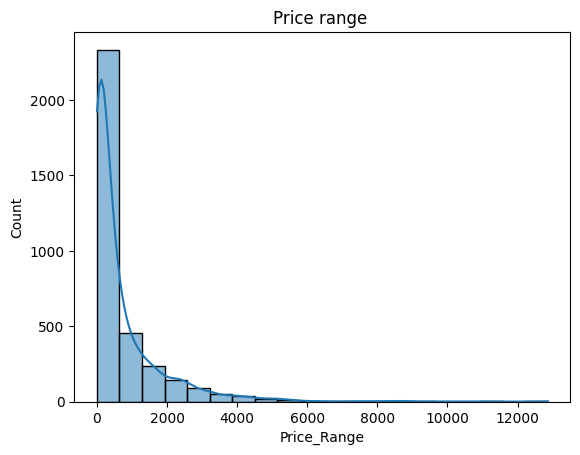

In [15]:
plt.figure()
sns.histplot(df['Price_Range'], bins=20, kde=True)
plt.title('Price range ')
plt.show()

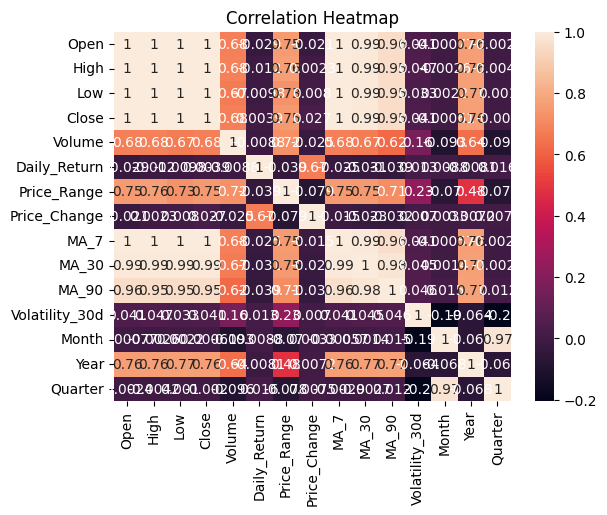

In [16]:
plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

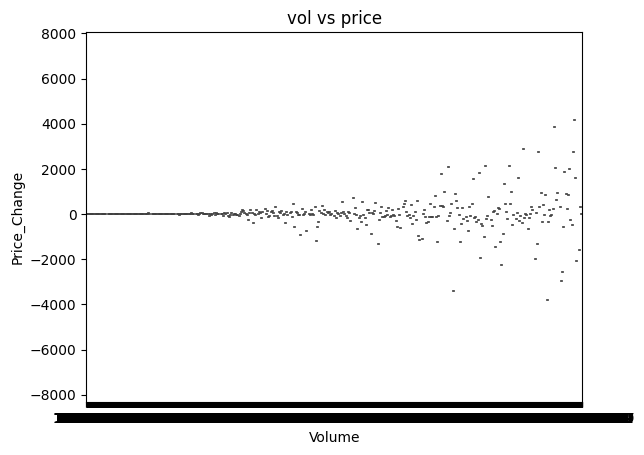

In [18]:
plt.figure()
sns.violinplot(x='Volume', y='Price_Change', data=df)
plt.title('vol vs price')
plt.show()

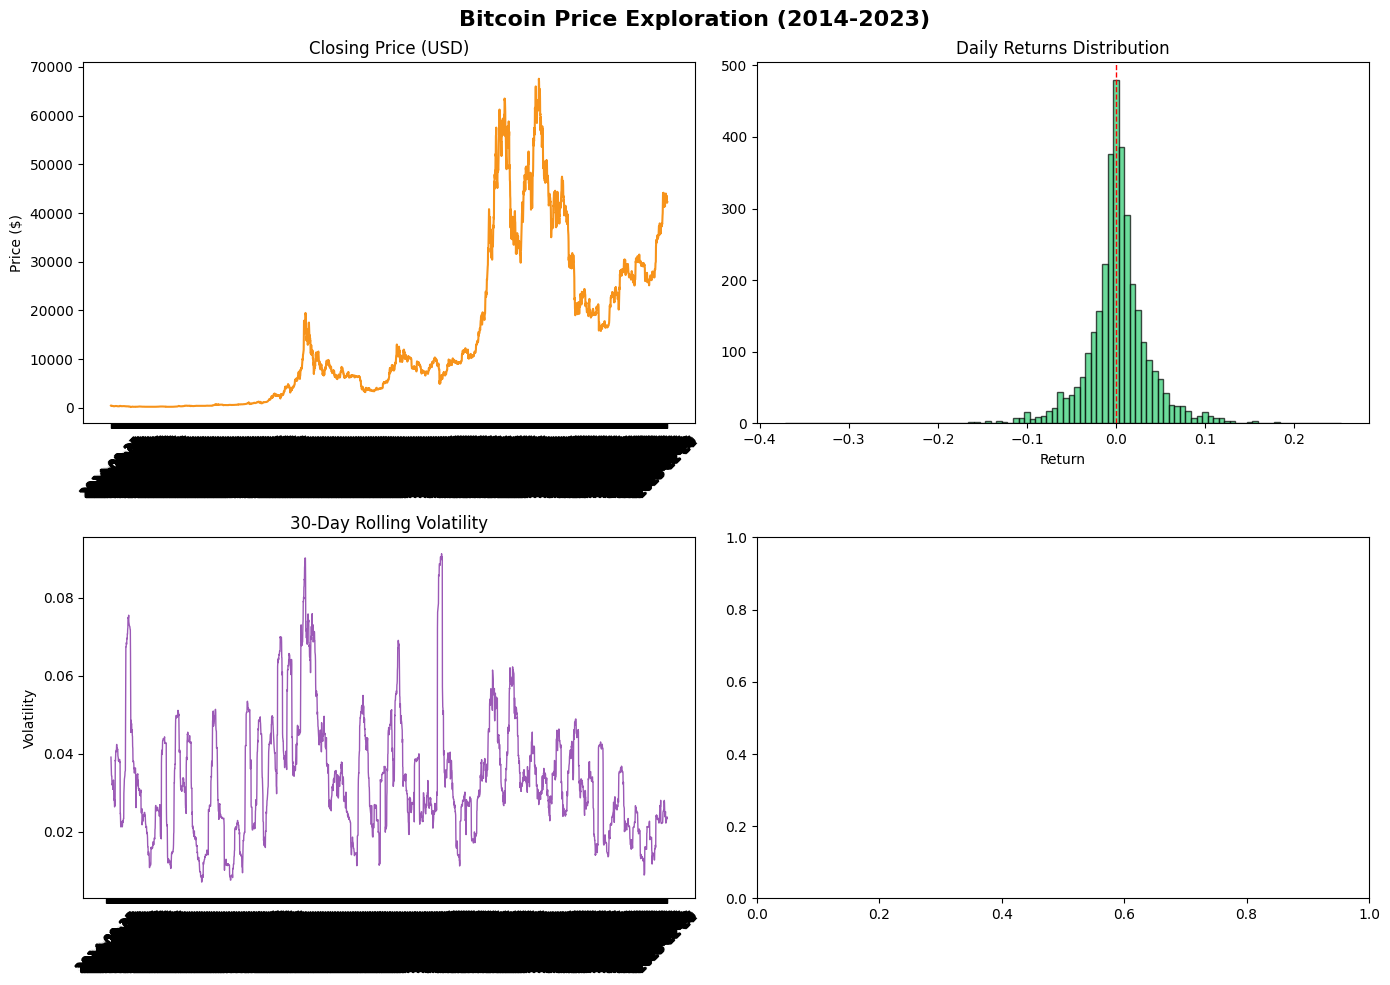

In [21]:
#Quick visualization of price evolution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bitcoin Price Exploration (2014-2023)', fontsize=16, fontweight='bold')

# 1. Closing Price Timeline
axes[0, 0].plot(df['Date'], df['Close'], linewidth=1.5, color='#F7931A')
axes[0, 0].set_title('Closing Price (USD)')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Daily Returns Distribution
df['Returns'] = df['Close'].pct_change()
axes[0, 1].hist(df['Returns'].dropna(), bins=100, edgecolor='black', alpha=0.7, color='#2ECC71')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_title('Daily Returns Distribution')
axes[0, 1].set_xlabel('Return')

# 3. Rolling Volatility (30-day)
df['Volatility'] = df['Returns'].rolling(window=30).std()
axes[1, 0].plot(df['Date'], df['Volatility'], linewidth=1, color='#9B59B6')
axes[1, 0].set_title('30-Day Rolling Volatility')
axes[1, 0].set_ylabel('Volatility')
axes[1, 0].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()
